In [2]:
import pandas as pd
import json
import ast
import pickle
import geopandas as gpd
from urllib.request import urlopen
from functools import reduce
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import os
import numpy as np
from scipy.stats import poisson
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
import researchpy as rp
import scikit_posthocs as sp
from scipy.stats import kendalltau

In [3]:
df1 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2012.B18102-Data.csv",skiprows=[1])
df2 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2013.B18102-Data.csv",skiprows=[1])
df3 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2014.B18102-Data.csv",skiprows=[1])
df4 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2015.B18102-Data.csv",skiprows=[1])
df5 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2016.B18102-Data.csv",skiprows=[1])
df6 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2017.B18102-Data.csv",skiprows=[1])
df7 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2018.B18102-Data.csv",skiprows=[1])
df8 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2019.B18102-Data.csv",skiprows=[1])
df9 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2020.B18102-Data.csv",skiprows=[1])
df10 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2021.B18102-Data.csv",skiprows=[1])


#df11 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2021.B18102-Data.csv",skiprows=[1])
#df12 = pd.read_csv("/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/ISF Research_Tanvi/ISF DUIRI Hearing Loss/Census Data/5year/ACSDT5Y2022.B18102-Data.csv",skiprows=[1])

# Column label lists to use for various operations
all_cols = ['B18102_004E', 'B18102_007E', 'B18102_010E','B18102_013E', 'B18102_016E', 'B18102_019E', 'B18102_023E', 'B18102_026E','B18102_029E', 'B18102_032E', 'B18102_035E', 'B18102_038E']
male_loss_cols = [ 'B18102_004E', 'B18102_007E', 'B18102_010E','B18102_013E', 'B18102_016E', 'B18102_019E']
female_loss_cols = ['B18102_023E', 'B18102_026E','B18102_029E', 'B18102_032E', 'B18102_035E', 'B18102_038E']

years = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

In [4]:
i = 0
for df in dfs:
    df['Year'] = years[i]
    i = i+1

    #Generate a FIPS column and populate it from GEOID and use it as an index
for item in dfs:
    item['FIPS'] = item['GEO_ID'].str[9:]
    #item.set_index(['FIPS'], inplace=True)

In [5]:
# Create a dictionary to map state codes to two-character state abbreviations
state_lookup = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO',
    '09': 'CT', '10': 'DE', '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI',
    '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY',
    '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN',
    '28': 'MS', '29': 'MO', '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH',
    '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH',
    '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD',
    '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA',
    '54': 'WV', '55': 'WI', '56': 'WY', '72': 'PR'
}

# Split FIPS code to extract state code and create a new column for state abbreviation
for df in dfs:
    df['County'] = df['FIPS']


In [6]:
# Define a function to calculate metrics
def calculate_metrics(df):
    df['TotalLoss'] = df[all_cols].sum(axis=1)
    df['PercentageLoss'] = df['TotalLoss'] * 100 / df['B18102_001E']

    df['TotalLossMale'] = df[male_loss_cols].sum(axis=1)
    df['PercentageLossMale'] = df['TotalLossMale'] * 100 / df['B18102_002E']

    df['TotalLossFemale'] = df[female_loss_cols].sum(axis=1)
    df['PercentageLossFemale'] = df['TotalLossFemale'] * 100 / df['B18102_021E']

    return df

# Apply calculate_metrics to each DataFrame
dfs_calculated = [calculate_metrics(df) for df in dfs]

# Concatenate the DataFrames
result_df = pd.concat(dfs_calculated)
result_df['state'] = result_df['NAME'].apply(lambda x: x.split(', ')[-1])
result_df1 = result_df[~result_df['state'].isin(['Puerto Rico', 'Alaska', 'Hawaii'])]

# Create pivot table
pivot_table = pd.pivot_table(result_df1, index=['County', 'Year'], values=['TotalLoss', 'PercentageLoss', 'PercentageLossMale', 'PercentageLossFemale'])
pivot_table.reset_index(inplace=True)

In [7]:
county_year_counts = pivot_table[pivot_table['Year'].isin(years)].groupby('County')['Year'].nunique()
full_data_counties = county_year_counts[county_year_counts == len(years)].index
filtered_data = pivot_table[pivot_table['County'].isin(full_data_counties)]
table = filtered_data

In [8]:
# Get unique states
counties = table['County'].unique()

In [10]:
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import soft_dtw

40.458 --> 20.779 --> 20.373 --> 19.987 --> 19.870 --> 19.817 --> 19.752 --> 19.727 --> 19.725 --> 19.709 --> 


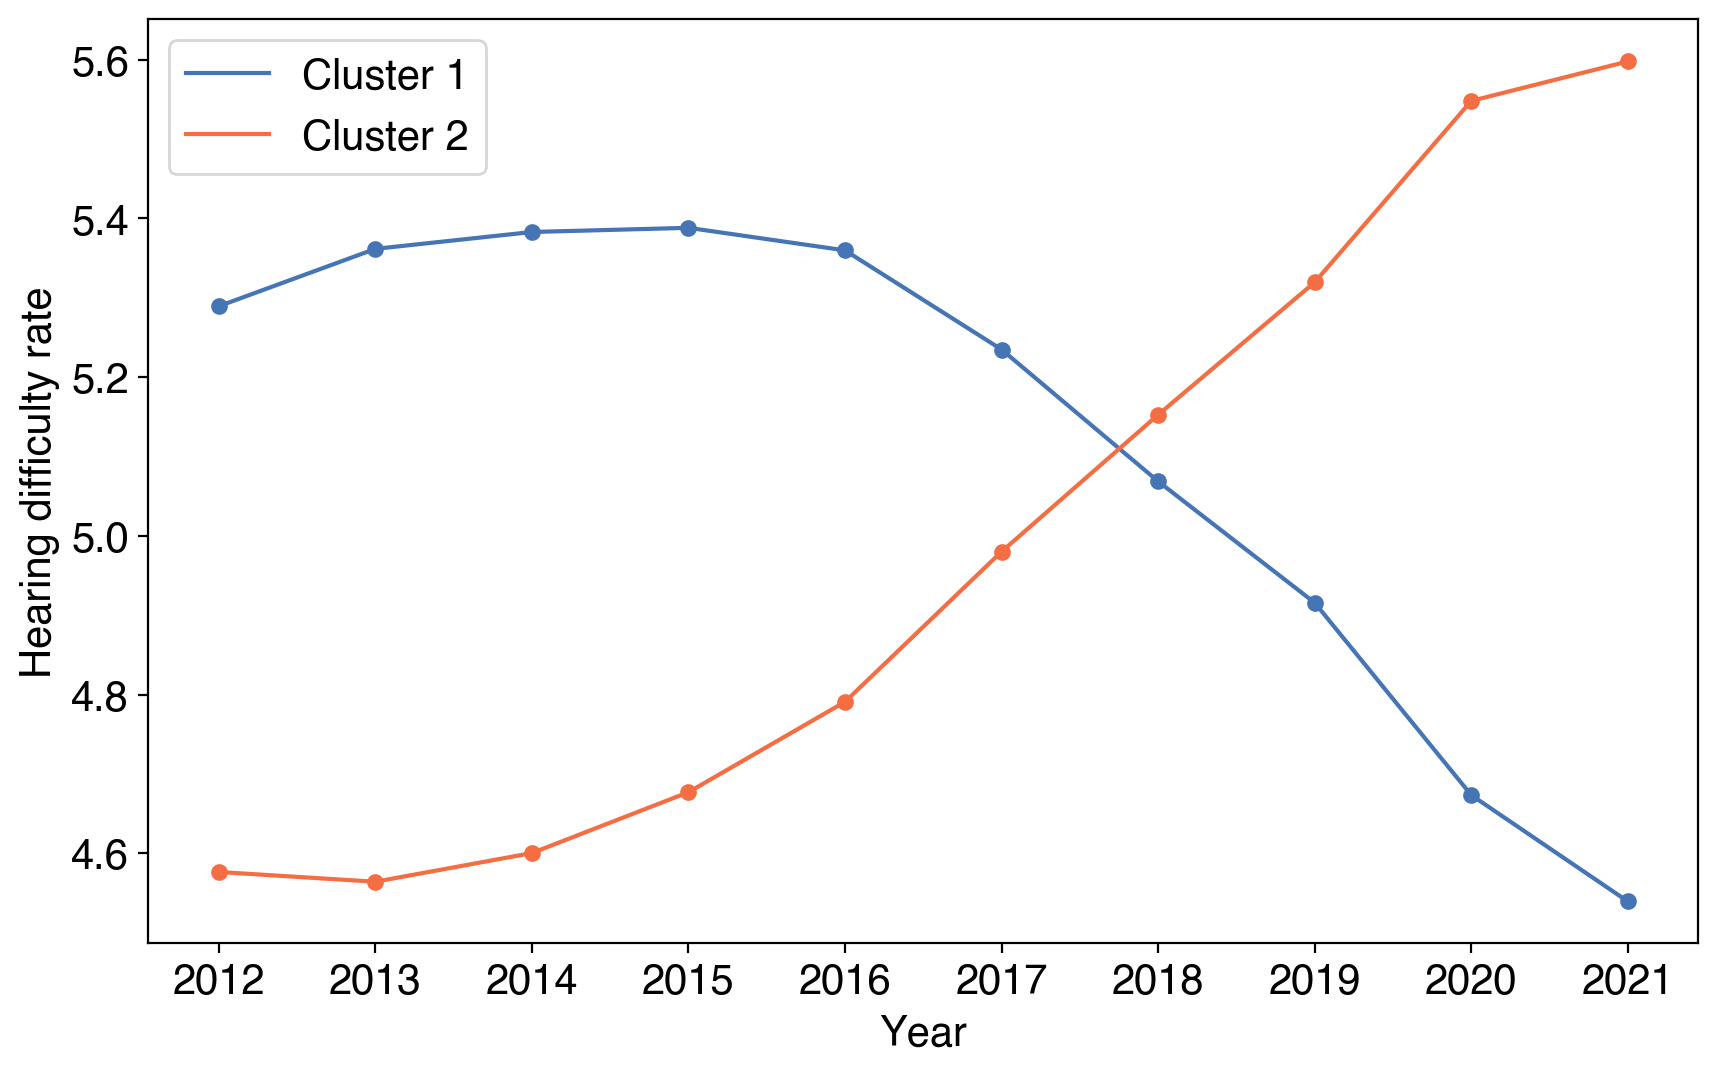

In [12]:
np.random.seed(0)
max_length = max(len(table[table['County'] == county]) for county in counties)
series = np.zeros(shape=(len(counties), max_length))

for index, county in enumerate(counties):
    county_data = table[table['County'] == county]['PercentageLoss'].to_numpy()
    series[index, :len(county_data)] = county_data

scaler = TimeSeriesScalerMeanVariance()
series_normalized = scaler.fit_transform(series)

tsne = TSNE(n_components=2, random_state=42)
embedded_series = tsne.fit_transform(series)

num = 2

kmeans = TimeSeriesKMeans(n_clusters=num, metric="softdtw", metric_params={"gamma": .01}, verbose=True, max_iter=10, n_init=1)
cluster_labels = kmeans.fit_predict(series_normalized)

clusters = {}
for i, county in enumerate(counties):
    cluster_label = cluster_labels[i] + 1
    if cluster_label not in clusters:
        clusters[cluster_label] = []
    clusters[cluster_label].append(county)

centroids = []
for i in range(num):
    cluster_series = series[cluster_labels == i]
    centroid = np.mean(cluster_series, axis=0)
    centroids.append(centroid)

colors = ['#4575b4','#f46d43']

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams.update({'font.size': 15})  # 设置字体大小

plt.figure(figsize=(10, 6))
for i in range(num):
    plt.plot(years, centroids[i], color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(years, centroids[i].ravel(), color=colors[i], marker='o', s=25)

plt.xlabel('Year')
plt.ylabel('Hearing difficulty rate')
plt.xticks(years, years)
plt.legend(loc='best')

#plt.savefig('/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/paper writing/Images/AAA/f4a.png', dpi=300, bbox_inches='tight', format='png')

plt.show()


In [13]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

county_df=pd.DataFrame()
county_df['FIPS'] = pd.DataFrame(counties)
county_df['Cluster'] = None

for cluster, counties in clusters.items():
    county_df.loc[county_df['FIPS'].isin(counties), 'Cluster'] = cluster

In [14]:
data = pd.read_csv('/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/Hearing Loss/data_r.csv')

data.FIPS = data.FIPS.astype(int)
county_df.FIPS = county_df.FIPS.astype(int)

cluster = county_df.merge(data, on='FIPS', how='left')

cluster['poi_density'] = cluster['poi_amount']/cluster['AREA_SQMI']

cluster['risky_poi_density'] = cluster['poi_area_density']

cluster = cluster.dropna()

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
#Generate the graph
import plotly.express as px

In [19]:
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties_json = json.load(response)

In [20]:
county_df['FIPS'] = county_df['FIPS'].astype(str).str.zfill(5)

# score

In [105]:
import numpy as np
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
from tslearn.preprocessing import TimeSeriesScalerMeanVariance


seed = 0
np.random.seed(seed)
pivot_df = table.pivot(index='County', columns='Year', values='PercentageLoss')

if pivot_df.isnull().any().any():
    pivot_df = pivot_df.fillna(pivot_df.mean(axis=0))

X = pivot_df.values
X = X.reshape((X.shape[0], X.shape[1], 1))  # (n_samples, n_timestamps, n_features)

downsample_factor = 1 
X_downsampled = X[:, ::downsample_factor, :]

scaler = TimeSeriesScalerMeanVariance()
X_normalized = scaler.fit_transform(X_downsampled)

range_n_clusters = [2, 3, 4]

for n_clusters in range_n_clusters:
    km = TimeSeriesKMeans(n_clusters=n_clusters, metric="softdtw", metric_params={"gamma": .01}, verbose=True, random_state=seed, max_iter=5, n_init=2)
    cluster_labels = km.fit_predict(X_normalized)

    silhouette_avg = silhouette_score(X_normalized, cluster_labels, metric="euclidean")
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


Init 1
40.458 --> 20.779 --> 20.373 --> 19.987 --> 19.870 --> 
Init 2
26.153 --> 19.437 --> 19.251 --> 19.226 --> 18.881 --> 
For n_clusters = 2 The average silhouette_score is : 0.3180356257607123
Init 1
22.769 --> 13.032 --> 12.868 --> 12.798 --> 12.786 --> 
Init 2
34.063 --> 13.186 --> 12.872 --> 12.800 --> 12.795 --> 
For n_clusters = 3 The average silhouette_score is : 0.23291460884172843
Init 1
19.272 --> 10.802 --> 10.068 --> 9.838 --> 9.777 --> 
Init 2
19.547 --> 9.988 --> 9.319 --> 9.223 --> 9.169 --> 
For n_clusters = 4 The average silhouette_score is : 0.18903237526642125


In [23]:
poverty = pd.read_csv('/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/other county level data/poverty/ACSST5Y2021.S1701-Data.csv',low_memory=False)
poverty['FIPS'] = poverty['GEO_ID'].astype(str).str[-5:]
pct_below_poverty = poverty[['FIPS','S1701_C03_001E','S1701_C03_011E','S1701_C03_012E']].copy()
pct_below_poverty.rename(columns={'S1701_C03_001E': 'pct_below_poverty','S1701_C03_011E': 'm_pct_below_poverty','S1701_C03_012E': 'f_pct_below_poverty'}, inplace=True)

In [24]:
income = pd.read_csv('/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/other county level data/meidan income/ACSST5Y2021.S1903-Data.csv',low_memory=False)
income['FIPS'] = income['GEO_ID'].astype(str).str[-5:]
median_income = income[['FIPS','S1903_C03_015E']].copy()
median_income.rename(columns={'S1903_C03_015E': 'median_income'}, inplace=True)

In [25]:
edu = pd.read_csv('/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/other county level data/education attainment/ACSST5Y2021.S1501-Data.csv',low_memory=False)
edu['FIPS'] = edu['GEO_ID'].astype(str).str[-5:]
edu['below_highschool'] = 100 - edu['S1501_C02_014E']
pct_educated = edu[['FIPS','S1501_C02_015E','below_highschool']].copy()
pct_educated.rename(columns={'S1501_C02_015E': 'over_bachelor'}, inplace=True)

In [26]:
insurance = pd.read_csv('/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/other county level data/insurance cover/ACSST5Y2021.S2701-Data.csv',low_memory=False)
insurance['FIPS'] = insurance['GEO_ID'].astype(str).str[-5:]
insurance['uninsured'] = 100 - insurance['S2701_C03_001E'].astype(float)
uninsured = insurance[['FIPS','uninsured']].copy()

In [27]:
hd21 = pd.read_csv('/Users/duan114/Downloads/productDownload_2024-02-13T224321/ACSDT5Y2021.B18102-Data.csv')
for i in range(9, 19, 3):
    hd21[f'B18102_0{i + 1:02}E'] = hd21[f'B18102_0{i + 1:02}E'].astype(int)
    hd21[f'B18102_0{i:02}E'] = hd21[f'B18102_0{i:02}E'].astype(int)
for i in range(28,38,3):
    hd21[f'B18102_0{i + 1:02}E'] = hd21[f'B18102_0{i + 1:02}E'].astype(int)
    hd21[f'B18102_0{i:02}E'] = hd21[f'B18102_0{i:02}E'].astype(int)
    
hd21['male_pop_ad'] = hd21['B18102_009E'] + hd21['B18102_012E'] + hd21['B18102_015E'] + hd21['B18102_018E']
hd21['female_pop_ad'] = hd21['B18102_028E'] + hd21['B18102_031E'] + hd21['B18102_034E'] + hd21['B18102_037E']
hd21['male_hl_ad'] = hd21['B18102_010E'] + hd21['B18102_013E'] + hd21['B18102_016E'] + hd21['B18102_019E']
hd21['female_hl_ad'] = hd21['B18102_029E'] + hd21['B18102_032E'] + hd21['B18102_035E'] + hd21['B18102_038E']

hd21['male_hlr_ad'] = hd21['male_hl_ad'] / hd21['male_pop_ad']
hd21['female_hlr_ad'] = hd21['female_hl_ad'] / hd21['female_pop_ad']

hd21['pop_ad'] = hd21['male_pop_ad'] + hd21['female_pop_ad']
hd21['hl_ad'] = hd21['male_hl_ad'] + hd21['female_hl_ad']
hd21['hlr_ad'] = (hd21['hl_ad'] / hd21['pop_ad'])*100
hd21['FIPS'] = hd21['GEO_ID'].str[-5:]
hd21['STATE'] = hd21['NAME'].str.split(', ').str[1]

hd21['old_dependency_ratio'] =  (hd21['B18102_015E'] + hd21['B18102_018E'] + hd21['B18102_034E'] + hd21['B18102_037E'])/ (hd21['B18102_009E'] + hd21['B18102_012E']+hd21['B18102_028E'] + hd21['B18102_031E'])*100
hd21['sex_ratio'] = (hd21['male_pop_ad']/hd21['female_pop_ad'])*100

columns_ad = ['FIPS','hlr_ad','old_dependency_ratio','sex_ratio']
hd = hd21[columns_ad]

In [28]:
from functools import reduce

dfs = [hd, uninsured, pct_below_poverty, median_income, pct_educated]  
merged_df = reduce(lambda left, right: pd.merge(left, right, on='FIPS', how='left'), dfs)

In [29]:
merged_df

,FIPS,hlr_ad,old_dependency_ratio,sex_ratio,uninsured,pct_below_poverty,m_pct_below_poverty,f_pct_below_poverty,median_income,over_bachelor,below_highschool
0,01001,5.559160,25.200186,89.737953,7.9,13.6,11.6,15.4,72441,28.1,10.4
1,01003,5.387146,35.592971,90.620008,9.7,9.2,7.0,11.3,82801,32.5,9.0
2,01005,6.323763,36.564830,86.232914,10.4,26.5,21.9,30.6,48768,11.2,24.3
3,01007,6.968111,26.799907,107.527153,10.0,16.9,17.0,16.9,67979,11.9,19.5
4,01009,5.963713,30.102619,97.851459,10.0,13.2,11.0,15.5,68945,14.9,16.4
...,...,...,...,...,...,...,...,...,...,...,...
3216,72145,5.138945,34.226038,88.105223,9.6,43.4,41.6,44.9,25851,22.7,23.9
3217,72147,3.727811,39.209226,101.430274,13.7,53.2,50.6,55.9,19683,14.2,27.0
3218,72149,4.782266,30.691176,90.503751,3.2,44.5,42.0,46.8,24328,21.5,21.4
3219,72151,2.546224,36.287438,90.877823,5.6,52.6,50.7,54.4,23274,17.4,26.9


In [30]:
data = pd.read_csv('/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/Hearing Loss/data_r.csv')

In [31]:
data.FIPS = data.FIPS.astype(int)
merged_df['FIPS'] = merged_df['FIPS'].astype(int)

In [32]:
df = data.merge(merged_df,on='FIPS',how='left')

In [33]:
df.columns

Index(['Unnamed: 0.1', 'FIPS', 'poi_amount', 'Unnamed: 0', 'ST', 'STATE',
       'ST_ABBR', 'STCNTY', 'COUNTY', 'LOCATION', 'geometry', 'AREA_SQMI',
       'poi_count', 'hl_pop', 'male_hl_pop', 'female_hl_pop', 'male_hlr',
       'female_hlr', 'hlr', 'male_pop', 'female_pop', 'population',
       'poi_area_density', 'poi_pop_density', 'poi_cat_density', 'hlr_ad',
       'old_dependency_ratio', 'sex_ratio', 'uninsured', 'pct_below_poverty',
       'm_pct_below_poverty', 'f_pct_below_poverty', 'median_income',
       'over_bachelor', 'below_highschool'],
      dtype='object')

In [34]:
df = df.dropna()
df1 = df[['FIPS','hlr_ad','poi_area_density', 'median_income', 'pct_below_poverty','uninsured','sex_ratio','old_dependency_ratio','over_bachelor','below_highschool','poi_amount','AREA_SQMI']].astype(float)

In [35]:
df1 = df1.dropna()

In [36]:
road = pd.read_csv('/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/Hearing Loss/Transportation/edge_len_data/edge_len_new.csv')
road_length = road[['FIPS','edge_len']]

In [37]:
df2 = df1.merge(road_length,on='FIPS',how='left')

In [38]:
df2['road_density'] = df2['edge_len'] / df2['AREA_SQMI']

In [39]:
df2['all_poi_area_density'] = df2['poi_amount'] / df2['AREA_SQMI']

In [40]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df3 = df2.rename(columns={
    'hlr_ad': 'hearing difficulty rate',
    'poi_area_density': 'POI density',
    'road_density':'road density',
    'median_income':'median income',
    'sex_ratio':'sex ratio',
    'pct_below_poverty':'poverty fraction',
    'uninsured':'uninsured fraction',
    'sex_ratio':'sex ratio',
    'old_dependency_ratio':'old dependency ratio',
    'over_bachelor':'% over bachelor',
    'below_highschool':'% below highschool'
})


In [42]:
df4 = df2.rename(columns={
    'hlr_ad': 'Hearing loss rate',
    'poi_area_density': 'Hearing-risky POI density',
    'all_poi_area_density':'Overall POI density',
    'road_density':'Road density',
    'median_income':'Median Income',
    'sex_ratio':'Sex ratio',
    'pct_below_poverty':'Poverty rate',
    'uninsured':'% Uninsured population',
    'old_dependency_ratio':'Old dependency rate',
    'over_bachelor':'% Population over bachelor',
    'below_highschool':'% Population below highschool'
})

In [43]:
df4

,FIPS,Hearing loss rate,Hearing-risky POI density,Median Income,Poverty rate,% Uninsured population,Sex ratio,Old dependency rate,% Population over bachelor,% Population below highschool,poi_amount,AREA_SQMI,edge_len,Road density,Overall POI density
0,1001.0,5.559160,0.230463,72441.0,13.6,7.9,89.737953,25.200186,28.1,10.4,693.0,594.455838,738639.569,1242.547423,1.165772
1,1003.0,5.387146,0.690009,82801.0,9.2,9.7,90.620008,35.592971,32.5,9.0,4625.0,1589.835294,2850778.171,1793.127994,2.909106
2,1005.0,6.323763,0.081355,48768.0,26.5,10.4,86.232914,36.564830,11.2,24.3,406.0,885.007618,1201140.094,1357.208763,0.458753
3,1007.0,6.968111,0.054621,67979.0,16.9,10.0,107.527153,26.799907,11.9,19.5,230.0,622.469288,765832.418,1230.313580,0.369496
4,1009.0,5.963713,0.186078,68945.0,13.2,10.0,97.851459,30.102619,14.9,16.4,656.0,644.890375,829848.587,1286.805663,1.017227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3098,56037.0,7.774190,0.018030,93852.0,10.5,13.3,106.297811,20.222128,19.4,7.3,830.0,10426.975770,3048586.969,292.374993,0.079601
3099,56039.0,3.346405,0.059797,113830.0,7.1,11.1,109.818980,22.974537,57.9,4.0,857.0,3996.846846,971084.874,242.962743,0.214419
3100,56041.0,6.872071,0.041312,84504.0,8.0,11.2,102.710633,25.817362,18.0,6.4,453.0,2081.719808,1126048.028,540.921993,0.217609
3101,56043.0,9.312977,0.018314,71223.0,6.6,10.7,99.898271,39.791321,26.2,5.9,206.0,2238.678265,571018.888,255.069653,0.092019


In [44]:
IRR = pd.read_csv('/Users/duan114/Library/CloudStorage/OneDrive-purdue.edu/24 hl/IRR_2000_2020.csv')

In [45]:
IRR1 = IRR[['FIPS2020','IRR2020']]
IRR2020 = IRR1.rename(columns={
    'FIPS2020': 'FIPS',
    'IRR2020': 'Index of relative rurality',
})

In [46]:
data1 = df4.merge(IRR2020,on='FIPS',how ='left')

In [47]:
data1.FIPS = data1.FIPS.astype(int)

In [48]:
data1['FIPS'] = data1['FIPS'].astype(str).str.zfill(5)

In [49]:
cluster.FIPS = cluster.FIPS.astype(int)

In [50]:
cluster['FIPS'] = cluster['FIPS'].astype(str).str.zfill(5)

In [51]:
box = cluster.merge(data1, on='FIPS',how ='left')

In [55]:
box.columns = ['FIPS', 'Cluster', 'Unnamed: 0.1', 'poi_amount_x', 'Unnamed: 0', 'ST',
       'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'LOCATION', 'geometry',
       'AREA_SQMI_x', 'poi_count', 'hl_pop', 'male_hl_pop', 'female_hl_pop',
       'male_hlr', 'female_hlr', 'hlr', 'male_pop', 'female_pop', 'population',
       'poi_area_density', 'poi_pop_density', 'poi_cat_density', 'poi_density',
       'risky_poi_density', 'Hearing difficulty rate', 'Hearing-risky POI density',
       'Median Income', 'Poverty rate', '% Uninsured population', 'Sex ratio',
       'Old dependency rate', '% Population over bachelor',
       '% Population below highschool', 'poi_amount_y', 'AREA_SQMI_y',
       'edge_len', 'Road density', 'Overall POI density',
       'Index of relative rurality']

In [97]:
box['Sex ratio'].max()

206.50976464697047

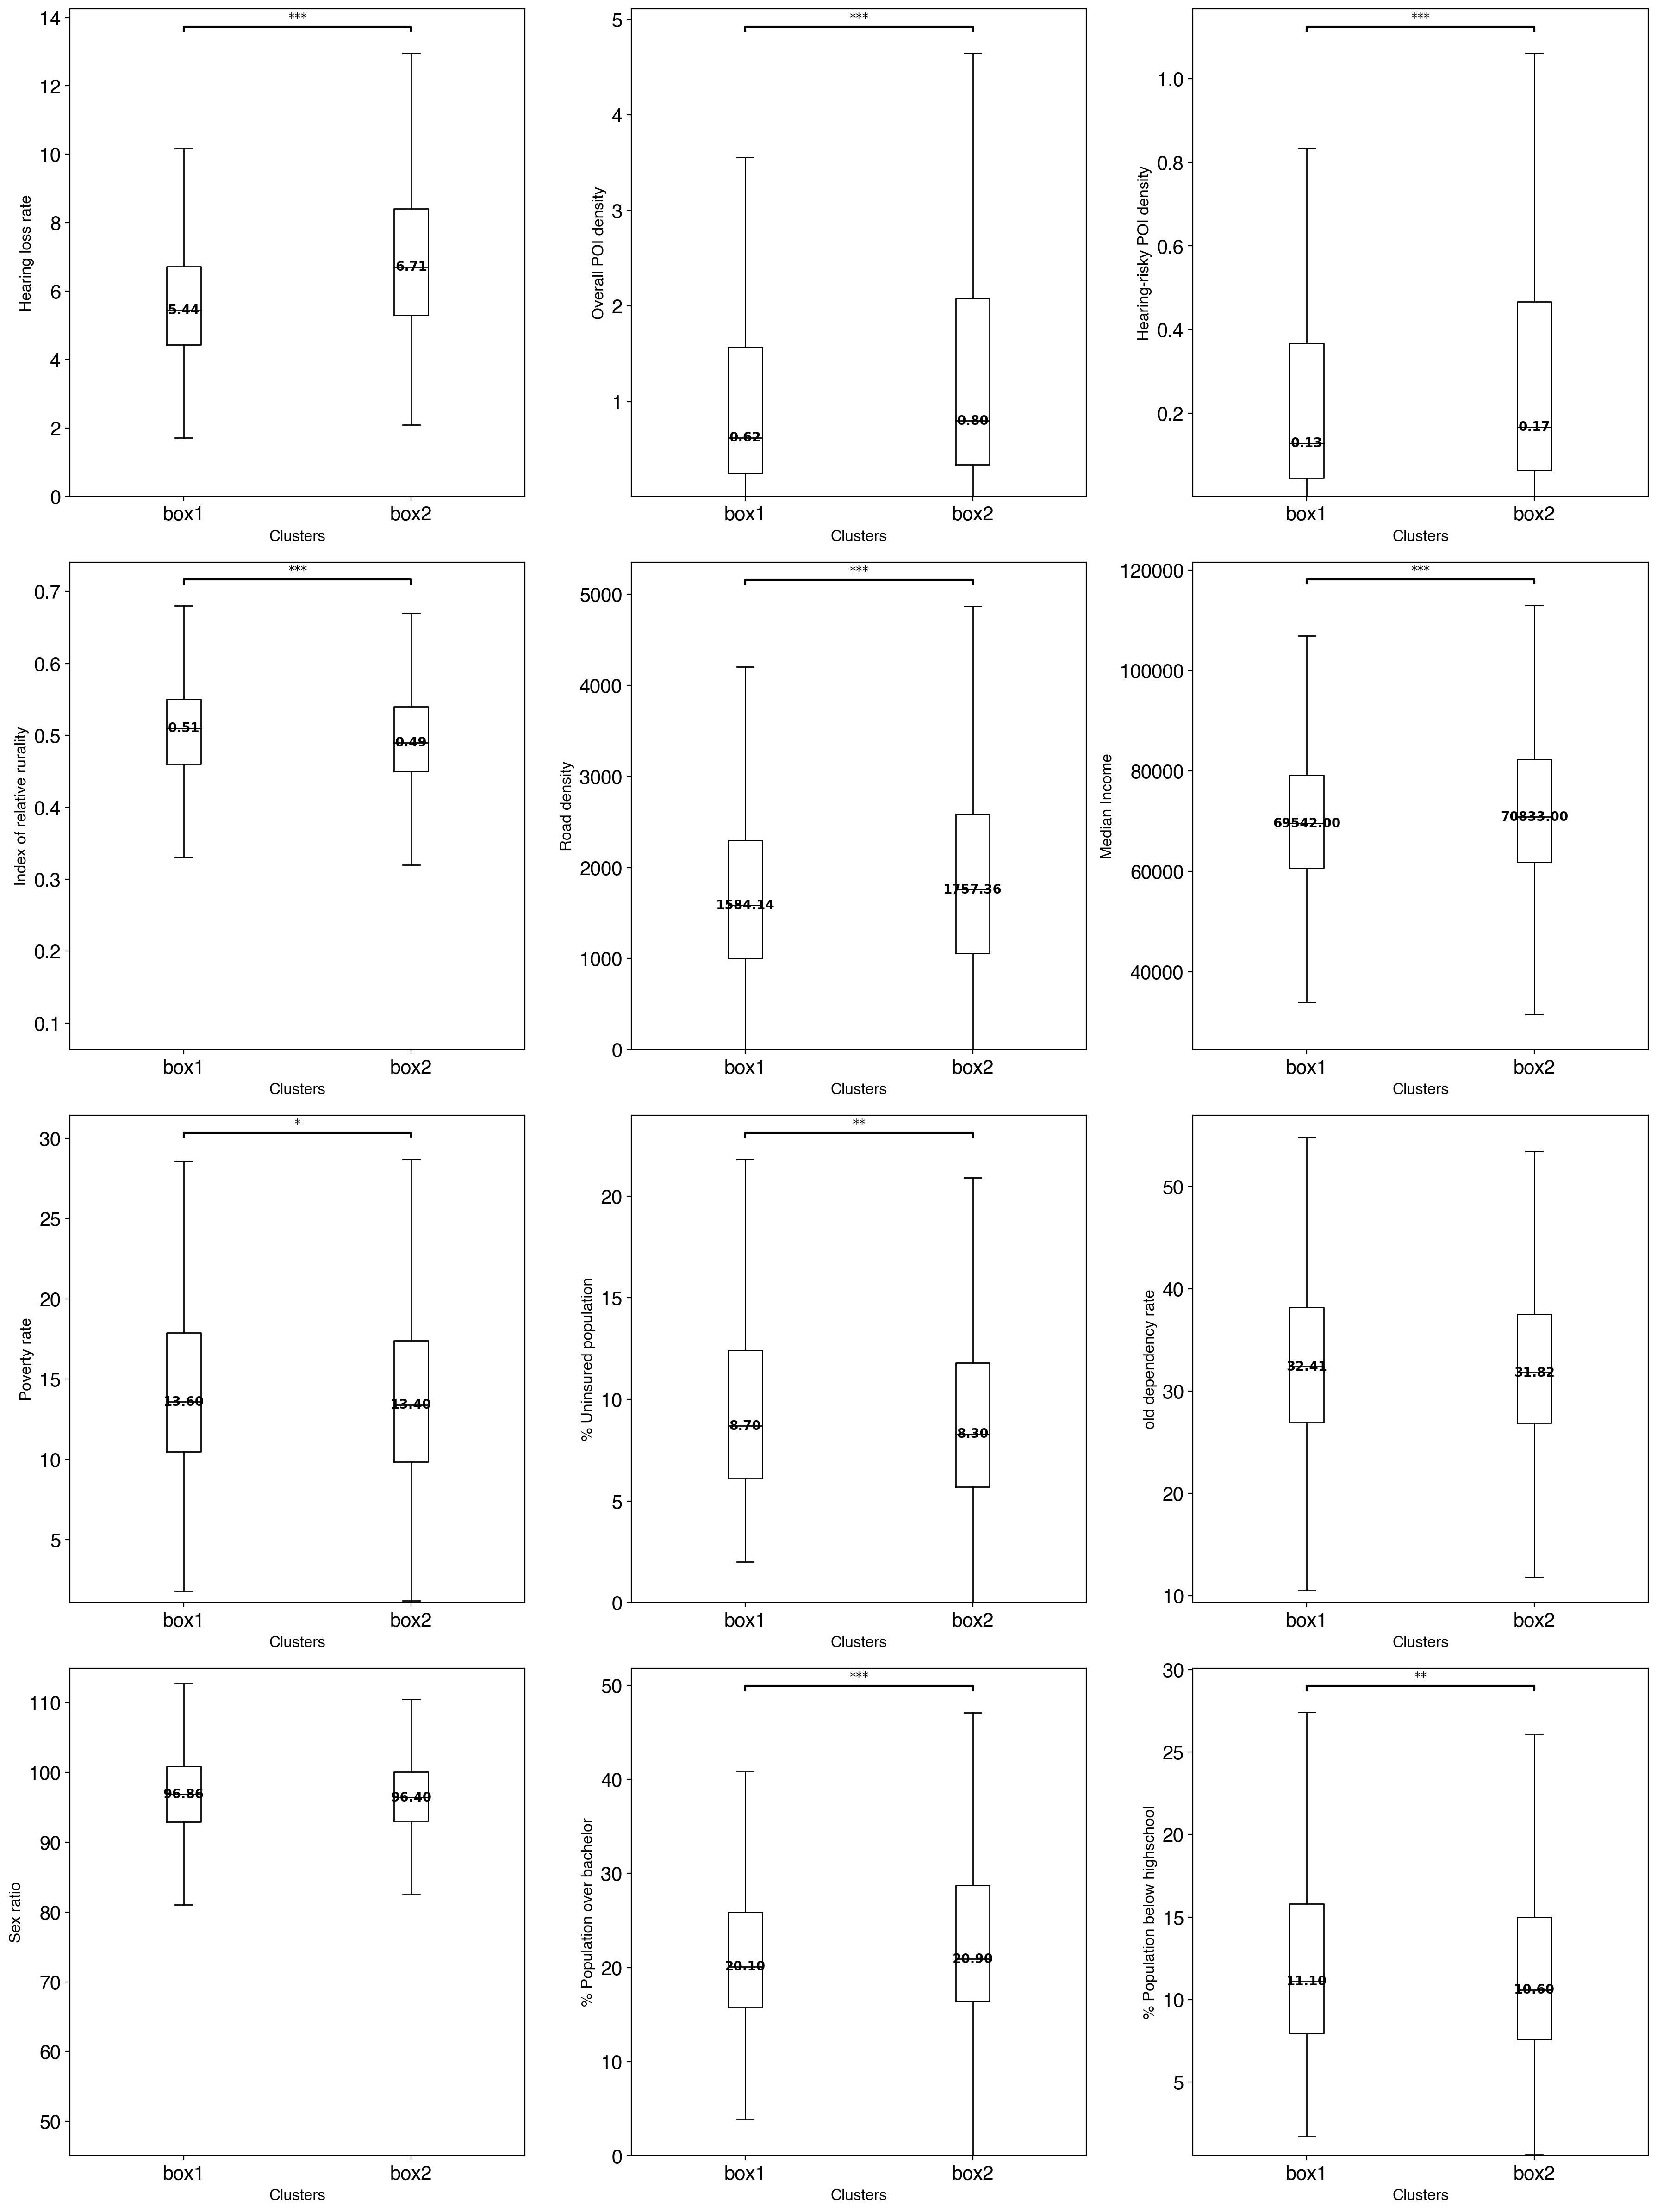

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

def prepare_data(data, col):
    df_no_outliers = pd.DataFrame()

    for cluster_label in data['Cluster'].unique():
        cluster_data = data[data['Cluster'] == cluster_label][col]
        Q1 = cluster_data.quantile(0.25)
        Q3 = cluster_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cluster_data_no_outliers = cluster_data[(cluster_data >= lower_bound) & (cluster_data <= upper_bound)]
        df_no_outliers = pd.concat([df_no_outliers, cluster_data_no_outliers])

    max_values_no_outliers = df_no_outliers.groupby(data.loc[df_no_outliers.index, 'Cluster']).max()
    return max_values_no_outliers.max().max()


columns_to_process = ['Hearing loss rate', 'Overall POI density', 'Hearing-risky POI density', 'Index of relative rurality',
                      'Road density', 'Median Income', 'Poverty rate', '% Uninsured population',
                      'old dependency rate','Sex ratio', '% Population over bachelor', '% Population below highschool']


import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

fig, axs = plt.subplots(4, 3, figsize=(18, 24))
plt.style.use('default')

for idx, col in enumerate(columns_to_process):
    df_no_outliers = pd.DataFrame()

    for box_label in box['Cluster'].unique():
        box_data = box[box['Cluster'] == box_label][col]
        Q1 = box_data.quantile(0.25)
        Q3 = box_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        box_data_no_outliers = box_data[(box_data >= lower_bound) & (box_data <= upper_bound)]
        df_no_outliers = pd.concat([df_no_outliers, box_data_no_outliers])

    max_values_no_outliers = df_no_outliers.groupby(box.loc[df_no_outliers.index, 'Cluster']).max()
    y1 = max_values_no_outliers.max().max()

    df_temp = pd.concat(
        [
            box[box.Cluster == 1][col].reset_index(drop=True).rename('box1'),
            box[box.Cluster == 2][col].reset_index(drop=True).rename('box2')
        ],
        axis=1
    )

    boxprops = dict(color="black")
    whiskerprops = dict(color="black")
    capprops = dict(color="black")
    medianprops = dict(color="black")
    meanlineprops = dict(linestyle='--', linewidth=1.5, color='red')

    ax = axs[idx // 3, idx % 3]
    df_temp.boxplot(showfliers=False, grid=False, boxprops=boxprops, whiskerprops=whiskerprops,
                    capprops=capprops, medianprops=medianprops, meanprops=meanlineprops, showmeans=False, meanline=False, ax=ax)

    medians = df_temp.median()
    for i, median in enumerate(medians):
        ax.text(i + 1, median, f'{median:.2f}', ha='center', va='center', color='black', fontweight='bold')

    ax.set_ylabel(f"{col}", weight='bold', fontsize=12)
    ax.set_xlabel("Clusters", weight='bold', fontsize=12)

    stat, p_value = mannwhitneyu(
        box[box['Cluster'] == 1][col],
        box[box['Cluster'] == 2][col]
    )

    alpha = 0.05  # 显著性水平
    def get_significance_stars(p_value):
        if p_value < 0.001:
            return '***'
        elif p_value < 0.01:
            return '**'
        elif p_value < 0.05:
            return '*'
        else:
            return 'ns'  # not significant

    if p_value < alpha:
        significance = get_significance_stars(p_value)
        y_range = (y1 - df_temp.min().min()) * 0.05  
        y = y1 + y_range
        ax.plot([1, 1, 2, 2], [y, y + y_range * 0.2, y + y_range * 0.2, y], lw=1.5, color='k')
        ax.text(1.5, y + y_range * 0.3, significance, ha='center', va='bottom', color='k')

 
    ax.set_ylim([df_temp.min().min() - 0.1 * abs(df_temp.min().min()), y1 + y_range * 2])

plt.tight_layout()
plt.show()


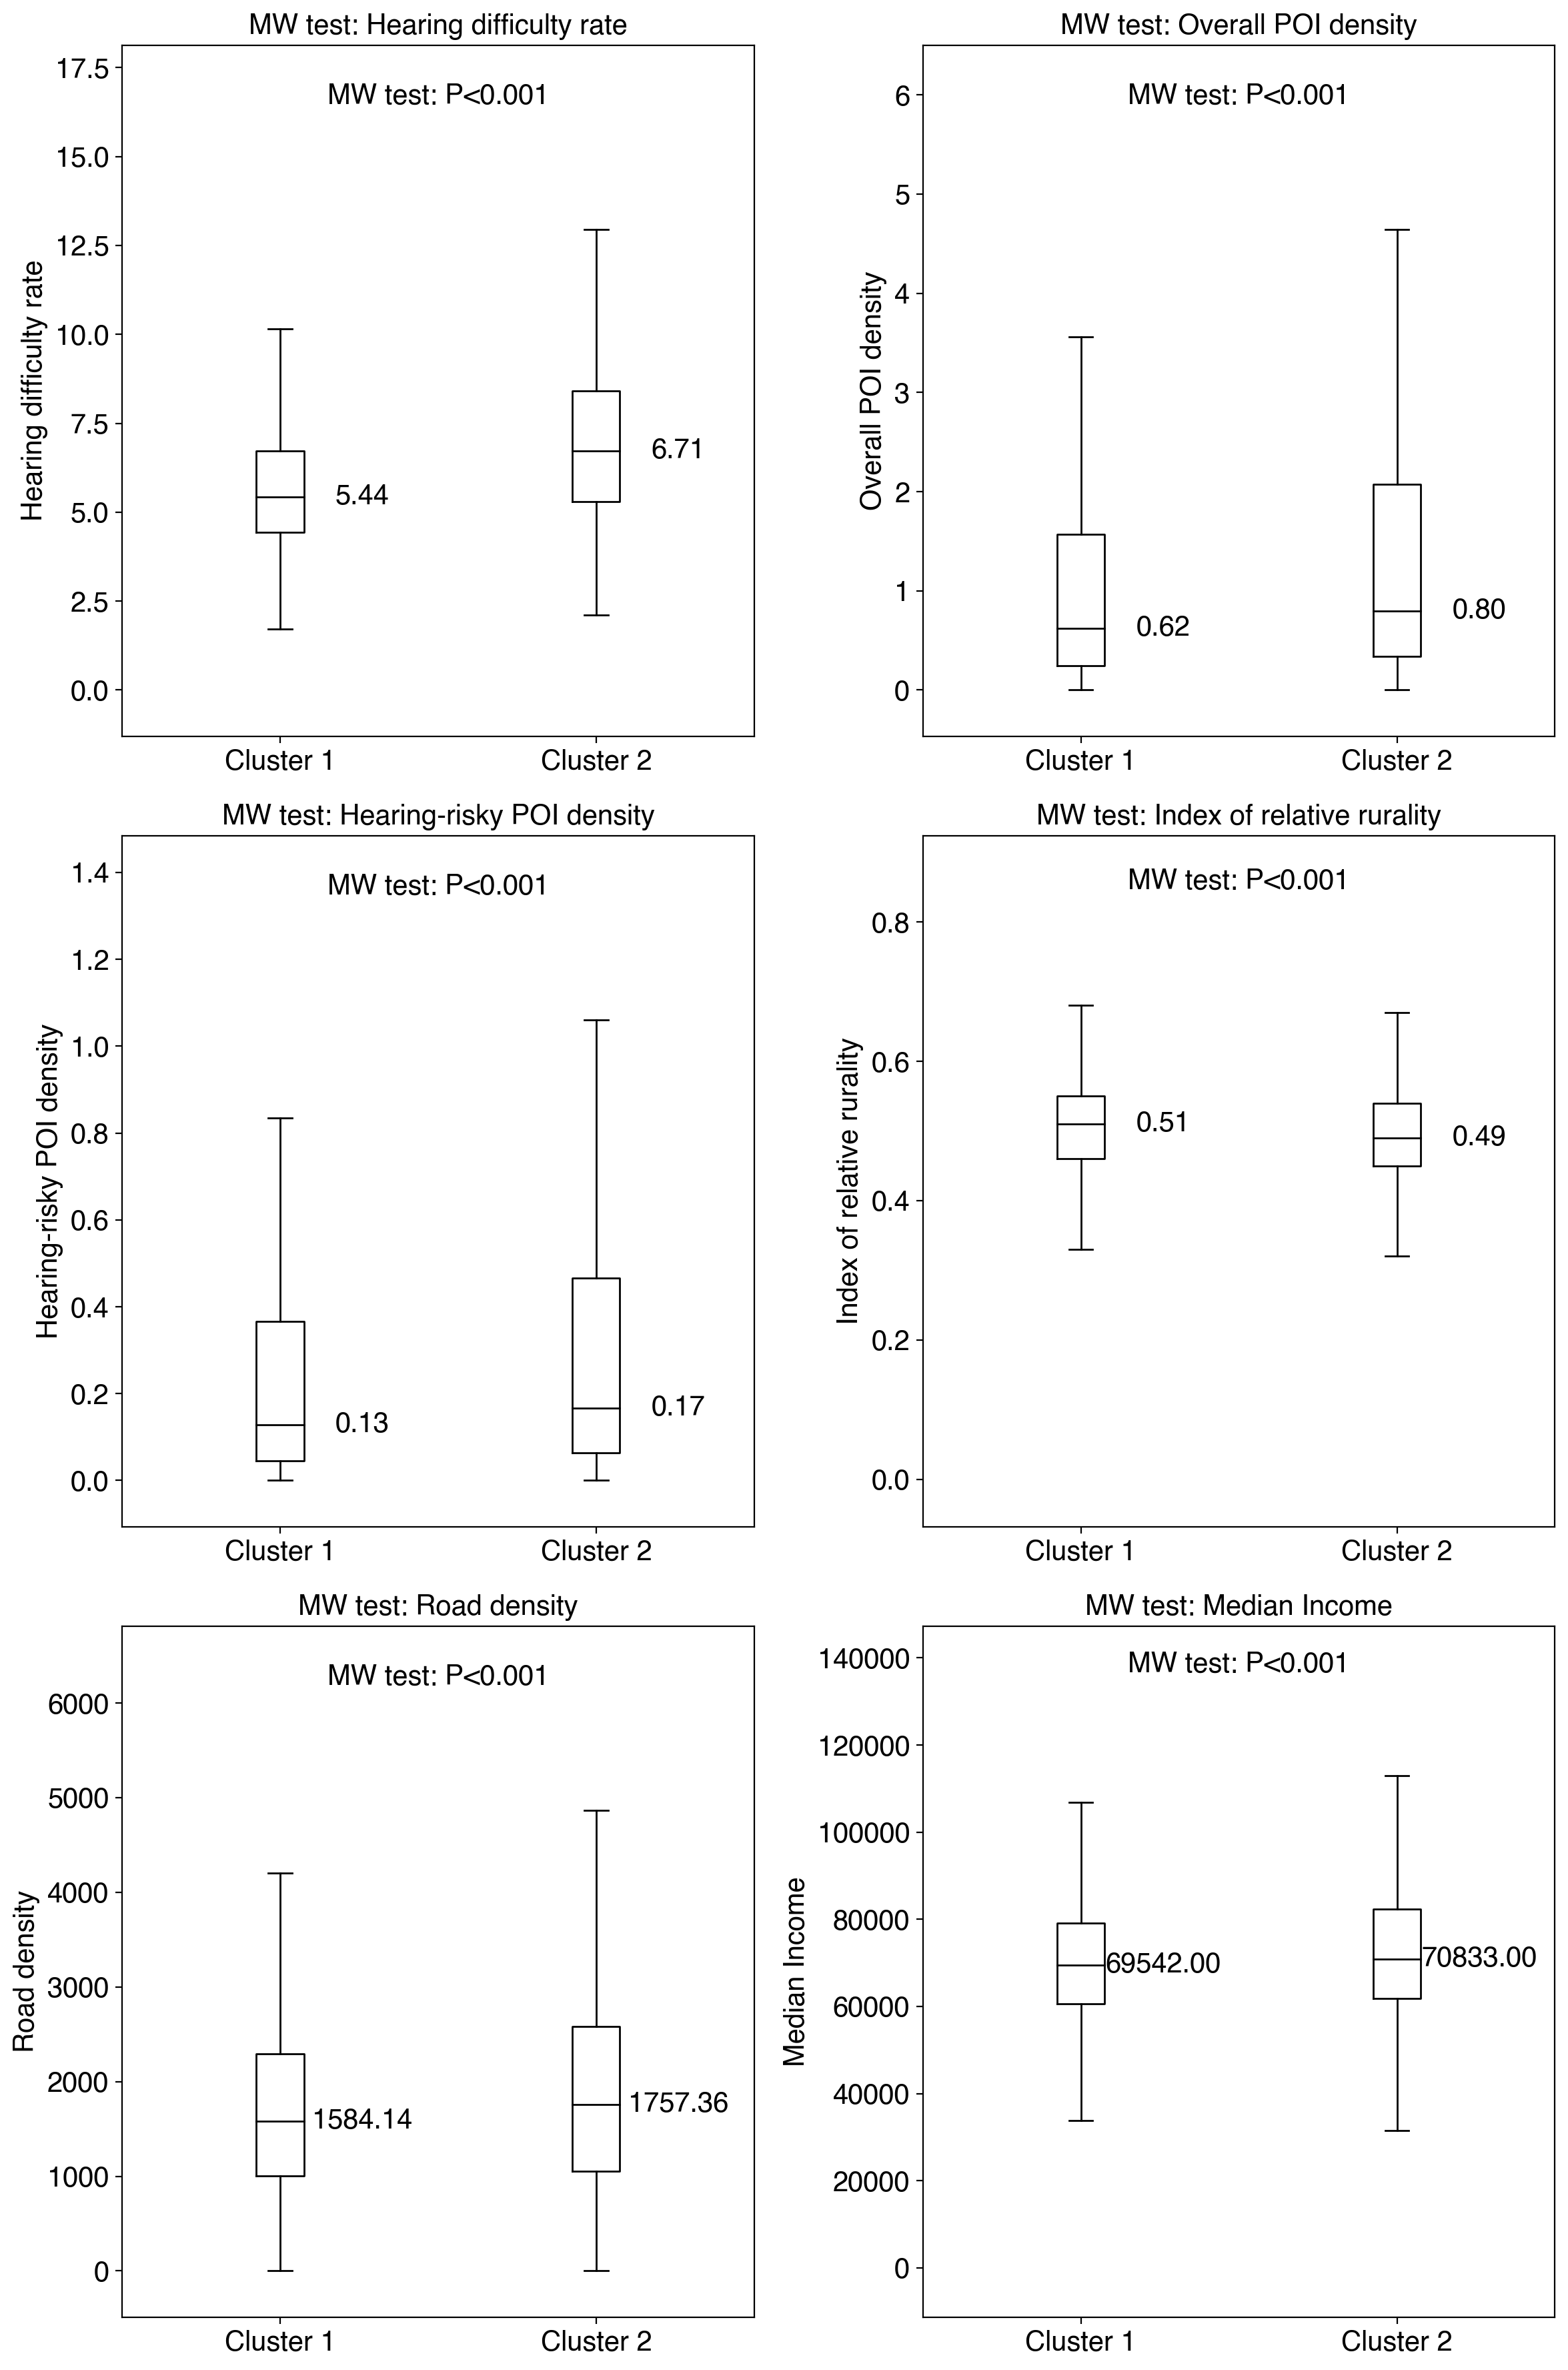

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

def prepare_data(data, col):
    df_no_outliers = pd.DataFrame()

    for cluster_label in data['Cluster'].unique():
        cluster_data = data[data['Cluster'] == cluster_label][col]
        Q1 = cluster_data.quantile(0.25)
        Q3 = cluster_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cluster_data_no_outliers = cluster_data[(cluster_data >= lower_bound) & (cluster_data <= upper_bound)]
        df_no_outliers = pd.concat([df_no_outliers, cluster_data_no_outliers])

    max_values_no_outliers = df_no_outliers.groupby(data.loc[df_no_outliers.index, 'Cluster']).max()
    return max_values_no_outliers.max().max()

columns_to_process = ['Hearing difficulty rate', 'Overall POI density', 'Hearing-risky POI density', 'Index of relative rurality',
                      'Road density', 'Median Income']

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

fig, axs = plt.subplots(3, 2, figsize=(12, 18))
plt.style.use('default')
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 15

for idx, col in enumerate(columns_to_process):
    df_no_outliers = pd.DataFrame()

    for box_label in box['Cluster'].unique():
        box_data = box[box['Cluster'] == box_label][col]
        Q1 = box_data.quantile(0.25)
        Q3 = box_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        box_data_no_outliers = box_data[(box_data >= lower_bound) & (box_data <= upper_bound)]
        df_no_outliers = pd.concat([df_no_outliers, box_data_no_outliers])

    max_values_no_outliers = df_no_outliers.groupby(box.loc[df_no_outliers.index, 'Cluster']).max()
    y1 = max_values_no_outliers.max().max()

    df_temp = pd.concat(
        [
            box[box.Cluster == 1][col].reset_index(drop=True).rename('cluster1'),
            box[box.Cluster == 2][col].reset_index(drop=True).rename('cluster2')
        ],
        axis=1
    )

    boxprops = dict(color="black")
    whiskerprops = dict(color="black")
    capprops = dict(color="black")
    medianprops = dict(color="black")
    meanlineprops = dict(linestyle='--', linewidth=1.5, color='red')

    ax = axs[idx // 2, idx % 2]
    df_temp.boxplot(showfliers=False, grid=False, boxprops=boxprops, whiskerprops=whiskerprops,
                    capprops=capprops, medianprops=medianprops, meanprops=meanlineprops, showmeans=False, meanline=False, ax=ax)

    medians = df_temp.median()
    for i, median in enumerate(medians):
        ax.text(i + 1.26, median, f'{median:.2f}', ha='center', va='center', color='black', fontweight='bold')

    ax.set_ylabel(f"{col}", weight='bold', fontsize=15)
    ax.set_xlabel("")
    ax.set_xticklabels(['Cluster 1', 'Cluster 2'])
    ax.set_title(f"MW test: {col}", weight='bold', fontsize=15)

    stat, p_value = mannwhitneyu(
        box[box['Cluster'] == 1][col],
        box[box['Cluster'] == 2][col]
    )

    alpha = 0.05  
    def get_significance_text(p_value):
        if p_value < 0.001:
            return 'MW test: P<0.001'
        elif p_value < 0.01:
            return 'MW test: P<0.01'
        elif p_value < 0.05:
            return 'MW test: P<0.05'
        else:
            return 'MW test: P>0.05'

    significance = get_significance_text(p_value)
    y_range = (y1 - df_temp.min().min()) * 0.2  
    y = y1 + y_range
    ax.text(1.5, y + y_range * 0.3, significance, ha='center', va='bottom', color='k')

    y_min = df_temp.min().min() if df_temp.min().min() < 0 else 0
    ax.set_ylim([y_min - 0.1 * abs(y_min) - 0.1 * abs(y1), y1 + y_range * 2])
    
plt.tight_layout()
plt.show()


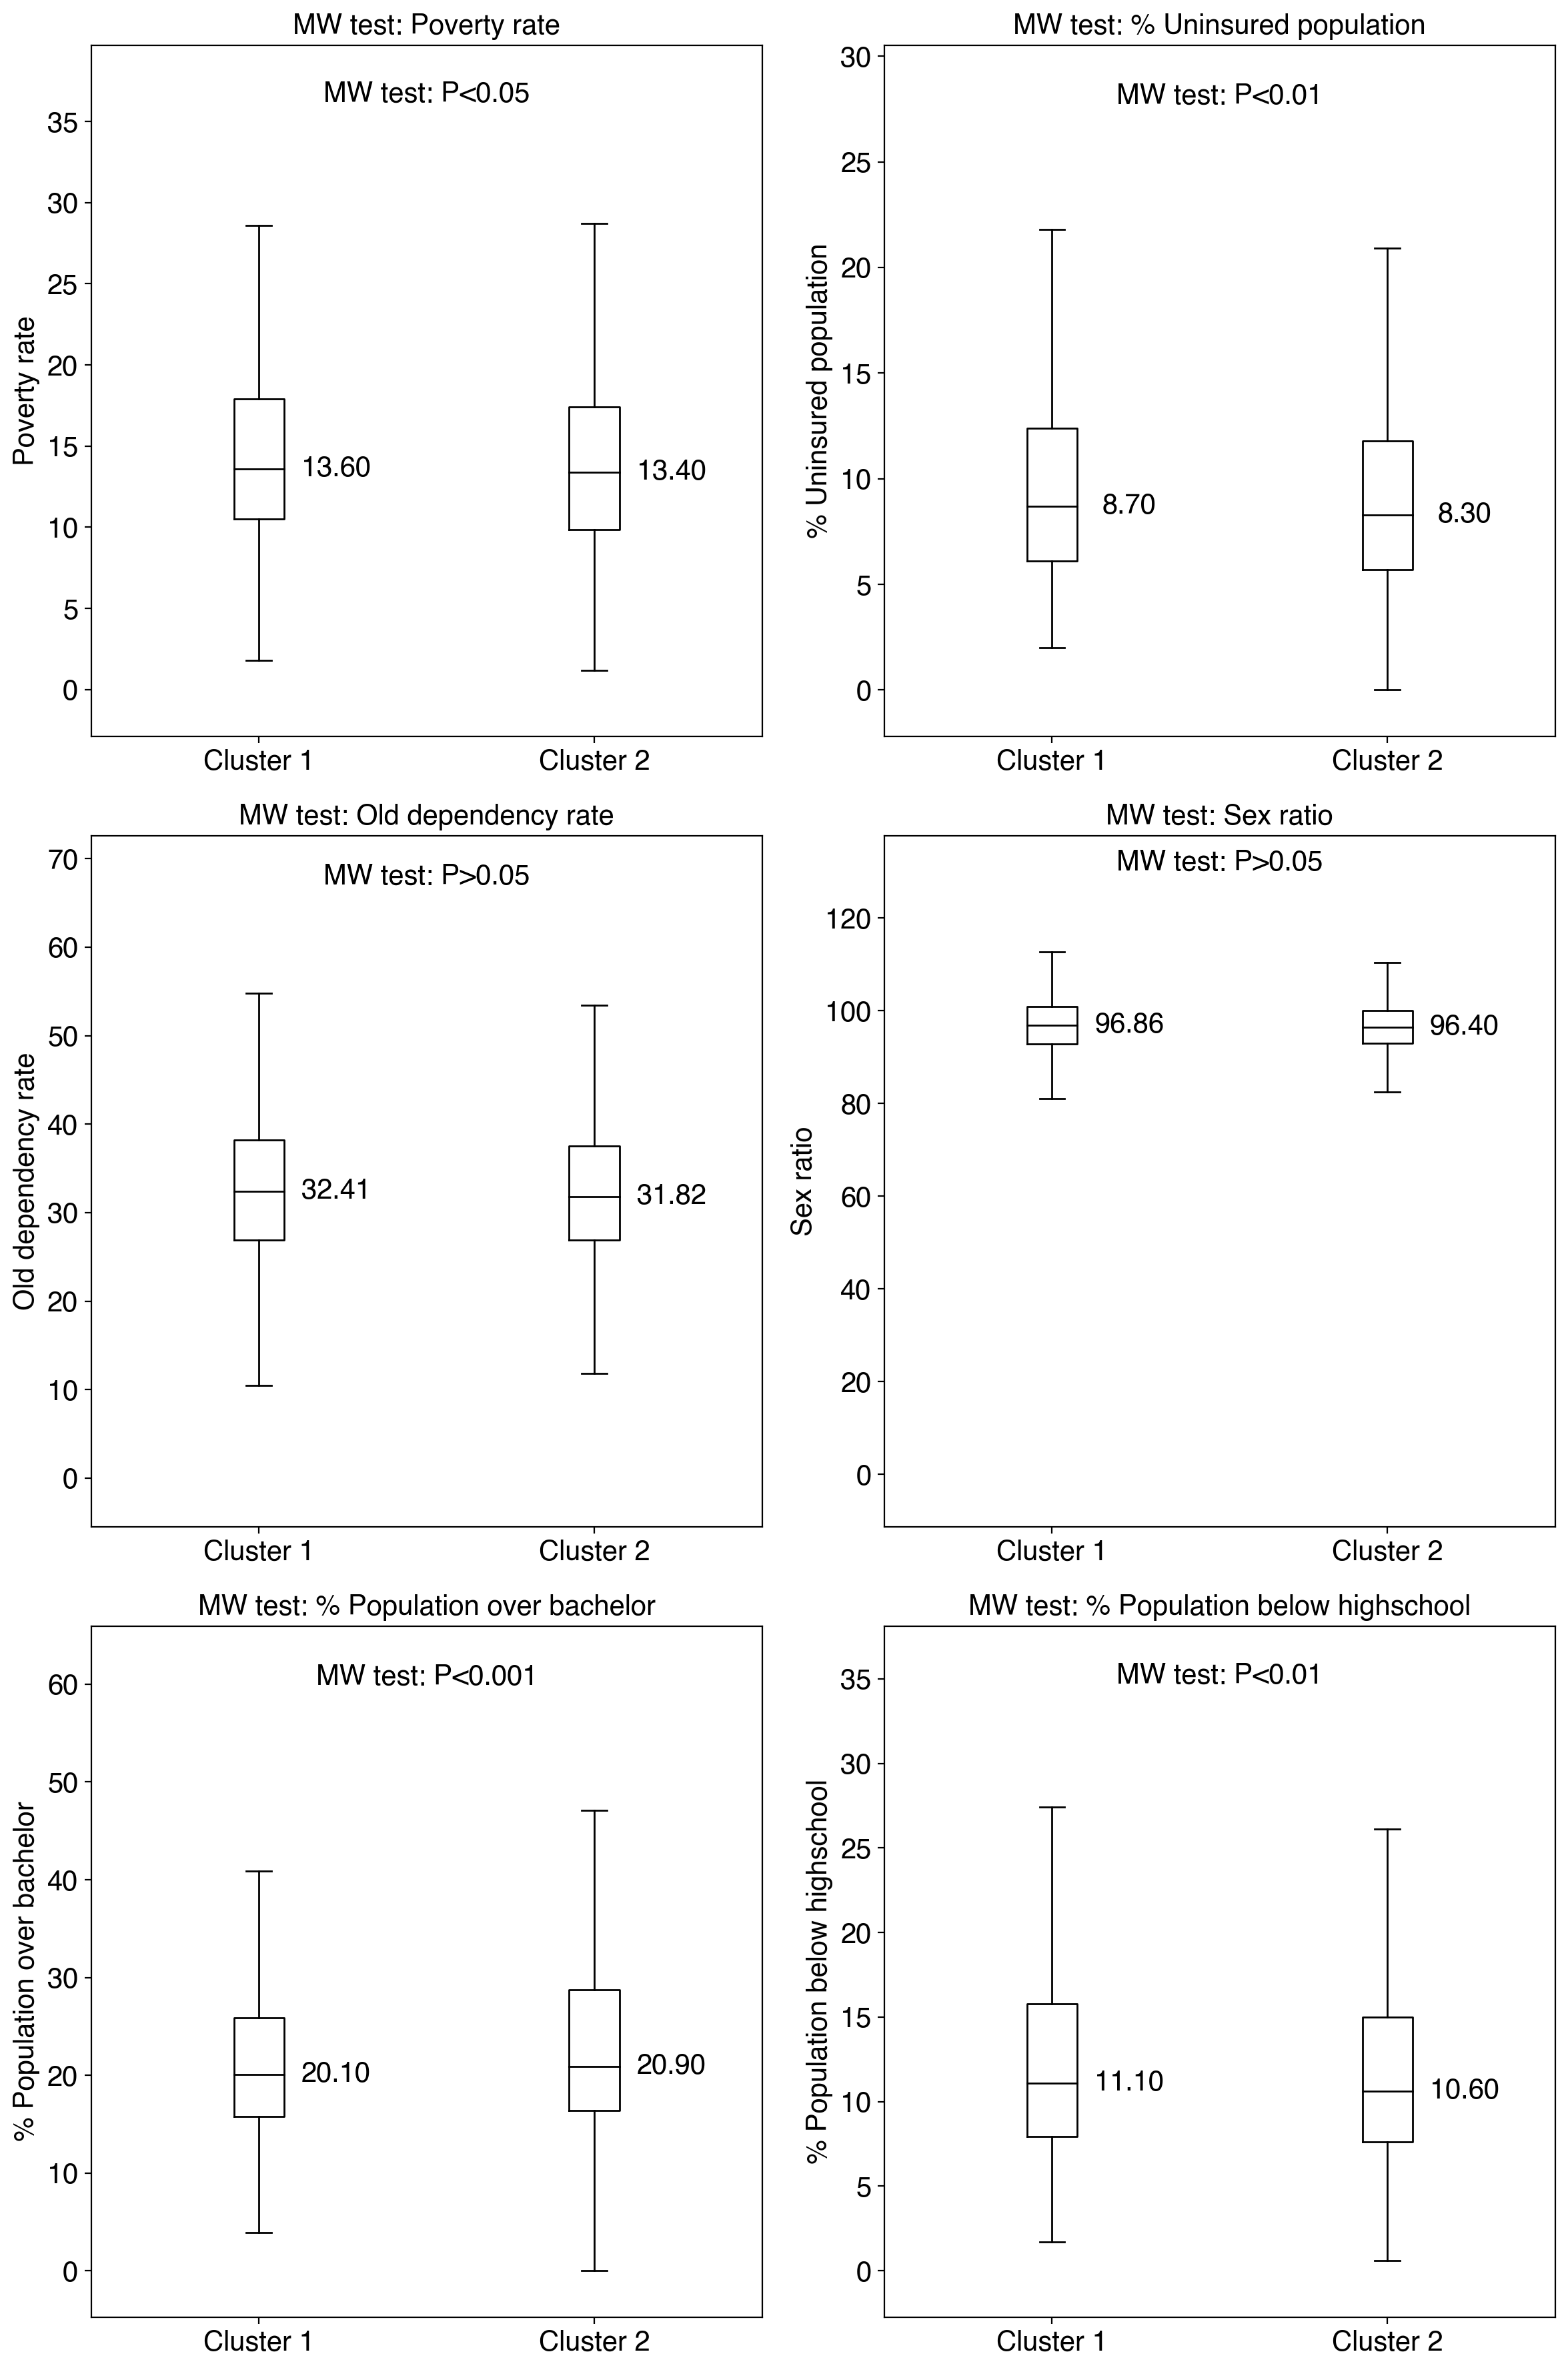

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

def prepare_data(data, col):
    df_no_outliers = pd.DataFrame()

    for cluster_label in data['Cluster'].unique():
        cluster_data = data[data['Cluster'] == cluster_label][col]
        Q1 = cluster_data.quantile(0.25)
        Q3 = cluster_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cluster_data_no_outliers = cluster_data[(cluster_data >= lower_bound) & (cluster_data <= upper_bound)]
        df_no_outliers = pd.concat([df_no_outliers, cluster_data_no_outliers])

    max_values_no_outliers = df_no_outliers.groupby(data.loc[df_no_outliers.index, 'Cluster']).max()
    return max_values_no_outliers.max().max()

columns_to_process = ['Poverty rate', '% Uninsured population',
                      'Old dependency rate','Sex ratio', '% Population over bachelor', '% Population below highschool']

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')


fig, axs = plt.subplots(3, 2, figsize=(12, 18))
plt.style.use('default')
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 15

for idx, col in enumerate(columns_to_process):
    df_no_outliers = pd.DataFrame()

    for box_label in box['Cluster'].unique():
        box_data = box[box['Cluster'] == box_label][col]
        Q1 = box_data.quantile(0.25)
        Q3 = box_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        box_data_no_outliers = box_data[(box_data >= lower_bound) & (box_data <= upper_bound)]

        df_no_outliers = pd.concat([df_no_outliers, box_data_no_outliers])


    max_values_no_outliers = df_no_outliers.groupby(box.loc[df_no_outliers.index, 'Cluster']).max()
    y1 = max_values_no_outliers.max().max()

    df_temp = pd.concat(
        [
            box[box.Cluster == 1][col].reset_index(drop=True).rename('cluster1'),
            box[box.Cluster == 2][col].reset_index(drop=True).rename('cluster2')
        ],
        axis=1
    )

    boxprops = dict(color="black")
    whiskerprops = dict(color="black")
    capprops = dict(color="black")
    medianprops = dict(color="black")
    meanlineprops = dict(linestyle='--', linewidth=1.5, color='red')

    ax = axs[idx // 2, idx % 2]
    df_temp.boxplot(showfliers=False, grid=False, boxprops=boxprops, whiskerprops=whiskerprops,
                    capprops=capprops, medianprops=medianprops, meanprops=meanlineprops, showmeans=False, meanline=False, ax=ax)

    medians = df_temp.median()
    for i, median in enumerate(medians):
        ax.text(i + 1.23, median, f'{median:.2f}', ha='center', va='center', color='black', fontweight='bold')

    ax.set_ylabel(f"{col}", weight='bold', fontsize=15)
    ax.set_xlabel("")
    ax.set_xticklabels(['Cluster 1', 'Cluster 2'])

    ax.set_title(f"MW test: {col}", weight='bold', fontsize=15)

    stat, p_value = mannwhitneyu(
        box[box['Cluster'] == 1][col],
        box[box['Cluster'] == 2][col]
    )

    alpha = 0.05  
    def get_significance_text(p_value):
        if p_value < 0.001:
            return 'MW test: P<0.001'
        elif p_value < 0.01:
            return 'MW test: P<0.01'
        elif p_value < 0.05:
            return 'MW test: P<0.05'
        else:
            return 'MW test: P>0.05'

    significance = get_significance_text(p_value)
    y_range = (y1 - df_temp.min().min()) * 0.2  
    y = y1 + y_range
    ax.text(1.5, y + y_range * 0.3, significance, ha='center', va='bottom', color='k')

    y_min = df_temp.min().min() if df_temp.min().min() < 0 else 0
    ax.set_ylim([y_min - 0.1 * abs(y_min) - 0.1 * abs(y1), y1 + y_range * 2])

plt.tight_layout()
plt.show()


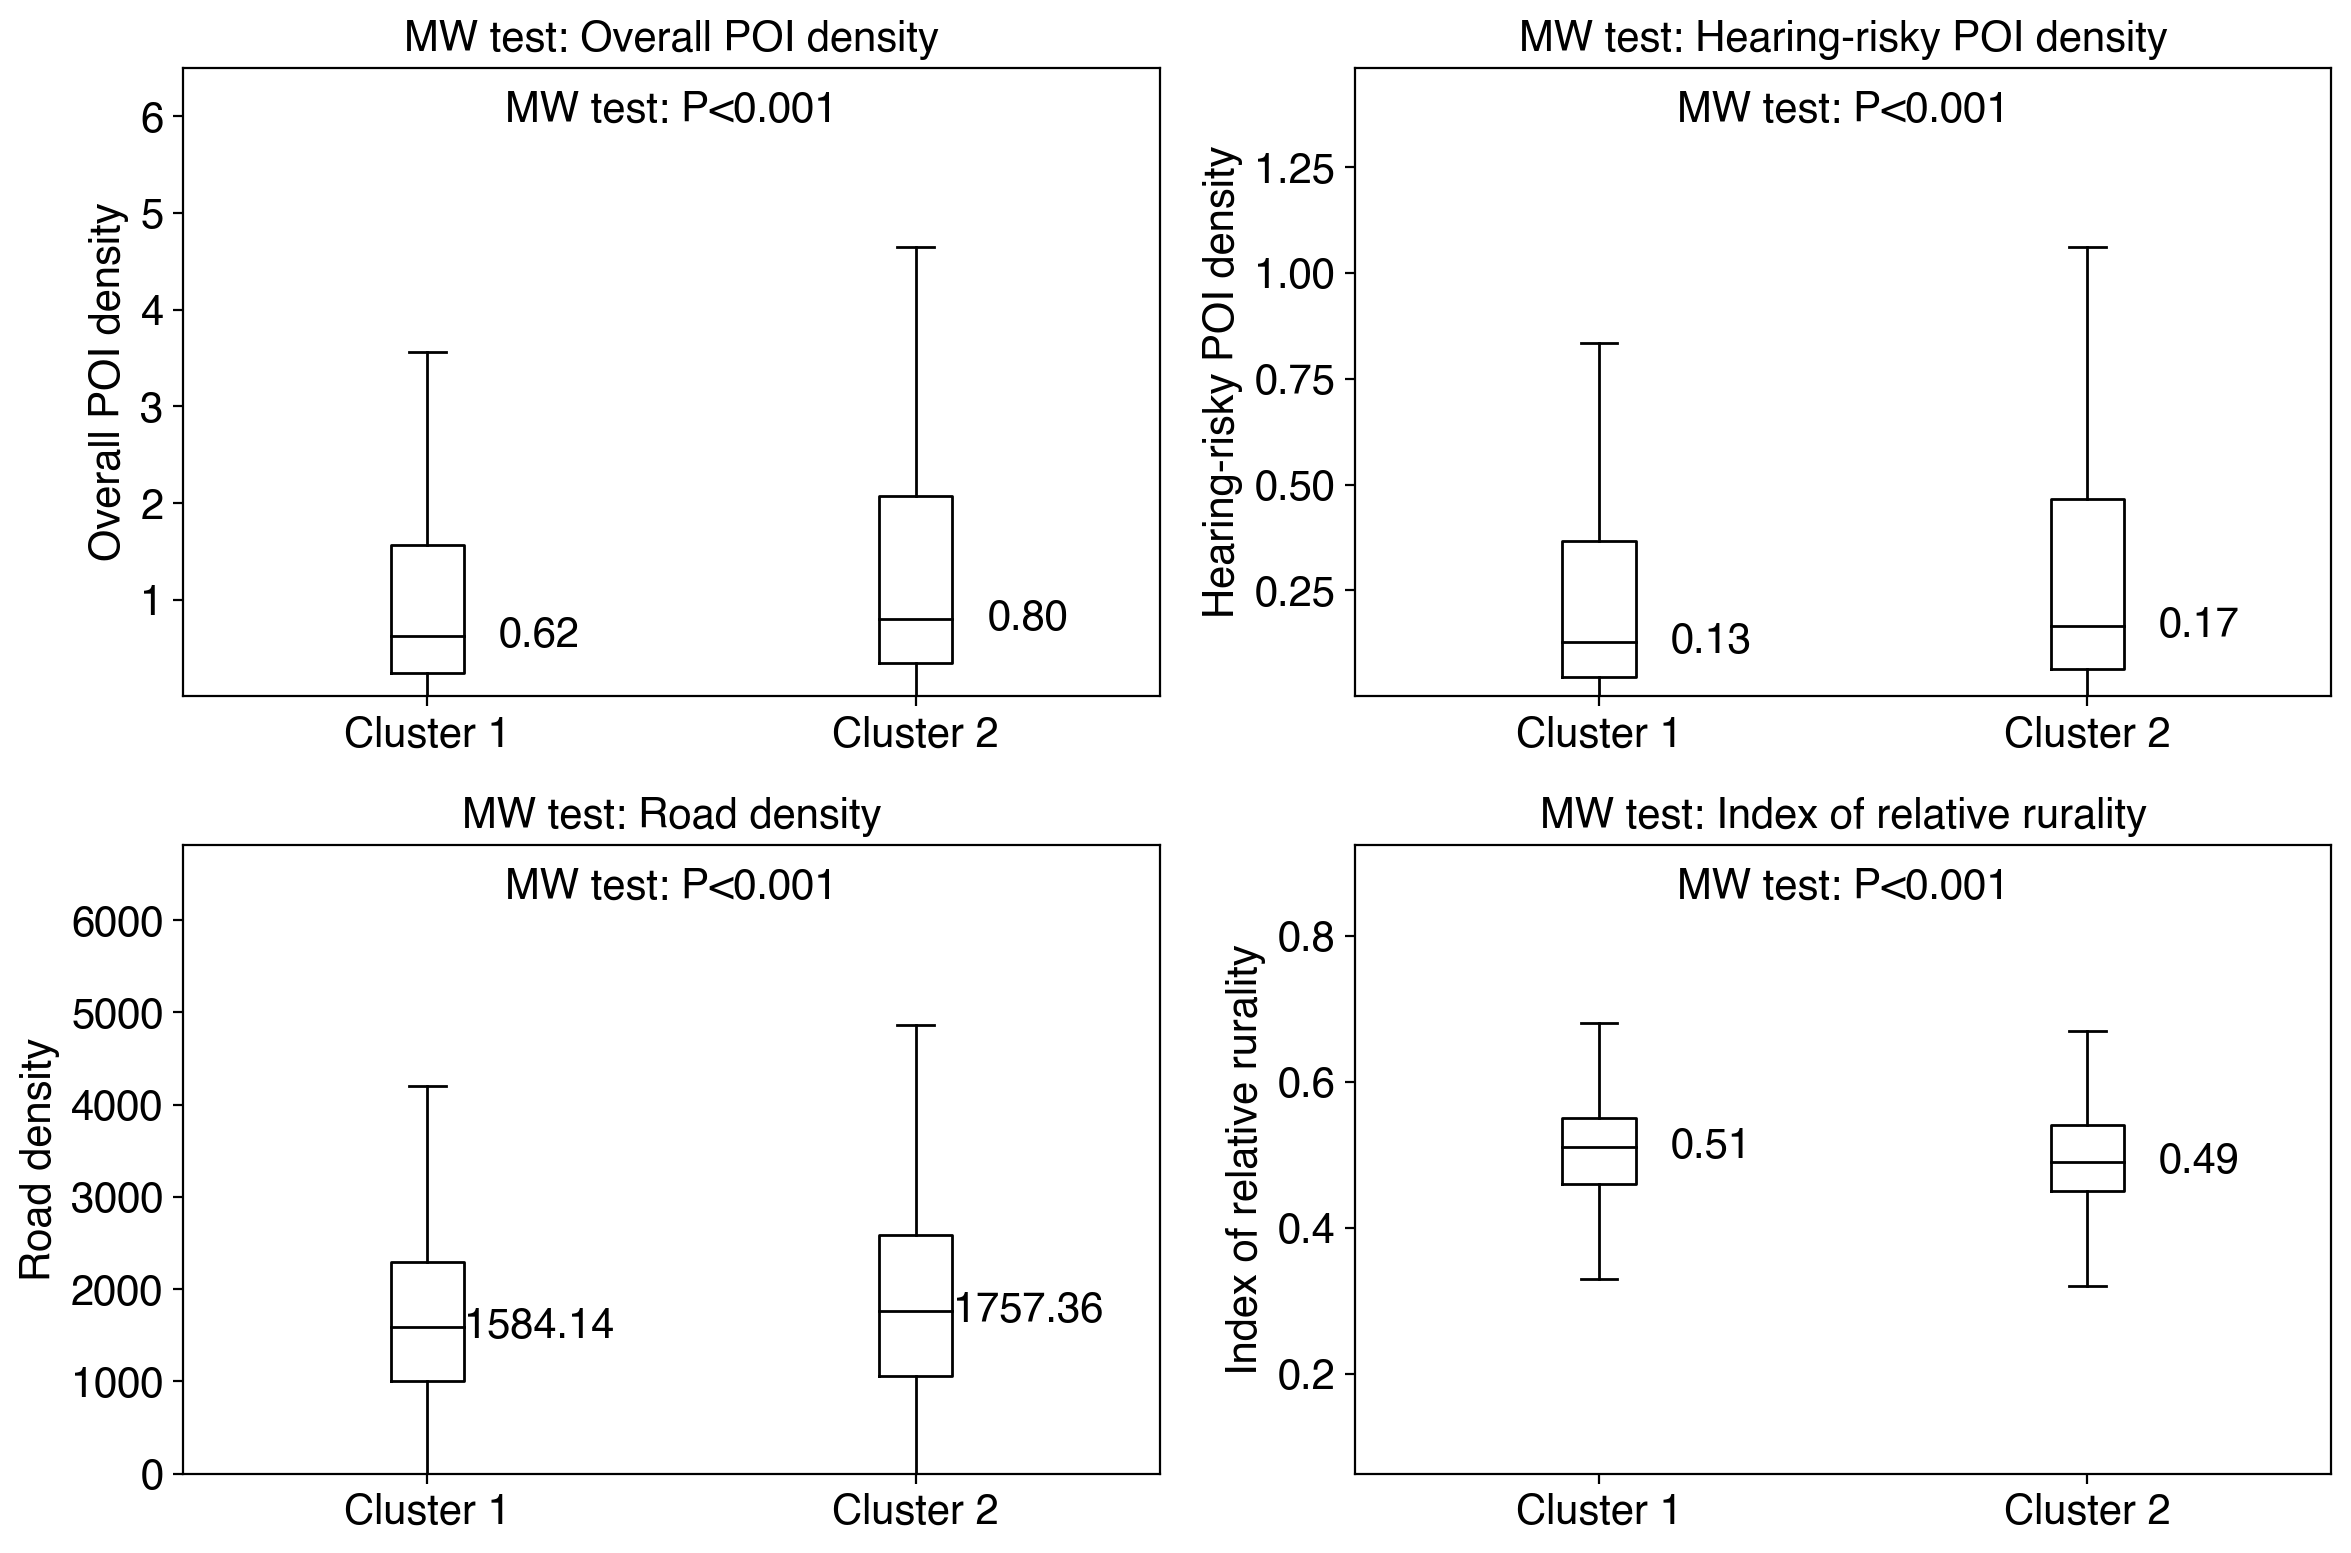

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

def prepare_data(data, col):
    df_no_outliers = pd.DataFrame()

    for cluster_label in data['Cluster'].unique():
        cluster_data = data[data['Cluster'] == cluster_label][col]
        Q1 = cluster_data.quantile(0.25)
        Q3 = cluster_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cluster_data_no_outliers = cluster_data[(cluster_data >= lower_bound) & (cluster_data <= upper_bound)]
        df_no_outliers = pd.concat([df_no_outliers, cluster_data_no_outliers])

    max_values_no_outliers = df_no_outliers.groupby(data.loc[df_no_outliers.index, 'Cluster']).max()
    return max_values_no_outliers.max().max()


columns_to_process = ['Overall POI density', 'Hearing-risky POI density', 'Road density','Index of relative rurality']


import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
plt.style.use('default')
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 15

for idx, col in enumerate(columns_to_process):

    df_no_outliers = pd.DataFrame()

    for box_label in box['Cluster'].unique():
        box_data = box[box['Cluster'] == box_label][col]
        Q1 = box_data.quantile(0.25)
        Q3 = box_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        box_data_no_outliers = box_data[(box_data >= lower_bound) & (box_data <= upper_bound)]

        df_no_outliers = pd.concat([df_no_outliers, box_data_no_outliers])

    max_values_no_outliers = df_no_outliers.groupby(box.loc[df_no_outliers.index, 'Cluster']).max()
    y1 = max_values_no_outliers.max().max()

    df_temp = pd.concat(
        [
            box[box.Cluster == 1][col].reset_index(drop=True).rename('cluster1'),
            box[box.Cluster == 2][col].reset_index(drop=True).rename('cluster2')
        ],
        axis=1
    )

    boxprops = dict(color="black")
    whiskerprops = dict(color="black")
    capprops = dict(color="black")
    medianprops = dict(color="black")
    meanlineprops = dict(linestyle='--', linewidth=1.5, color='red')


    ax = axs[idx // 2, idx % 2]
    df_temp.boxplot(showfliers=False, grid=False, boxprops=boxprops, whiskerprops=whiskerprops,
                    capprops=capprops, medianprops=medianprops, meanprops=meanlineprops, showmeans=False, meanline=False, ax=ax)

 
    medians = df_temp.median()
    for i, median in enumerate(medians):
        ax.text(i + 1.23, median, f'{median:.2f}', ha='center', va='center', color='black', fontweight='bold')


    ax.set_ylabel(f"{col}", weight='bold', fontsize=15)
    ax.set_xlabel("")
    ax.set_xticklabels(['Cluster 1', 'Cluster 2'])


    ax.set_title(f"MW test: {col}", weight='bold', fontsize=15)


    stat, p_value = mannwhitneyu(
        box[box['Cluster'] == 1][col],
        box[box['Cluster'] == 2][col]
    )


    alpha = 0.05
    def get_significance_text(p_value):
        if p_value < 0.001:
            return 'MW test: P<0.001'
        elif p_value < 0.01:
            return 'MW test: P<0.01'
        elif p_value < 0.05:
            return 'MW test: P<0.05'
        else:
            return 'MW test: P>0.05'

    significance = get_significance_text(p_value)
    y_range = (y1 - df_temp.min().min()) * 0.2  
    y = y1 + y_range
    ax.text(1.5, y + y_range * 0.3, significance, ha='center', va='bottom', color='k')


    ax.set_ylim([df_temp.min().min() - 0.1 * abs(df_temp.min().min()), y1 + y_range * 2])

plt.tight_layout()
plt.show()


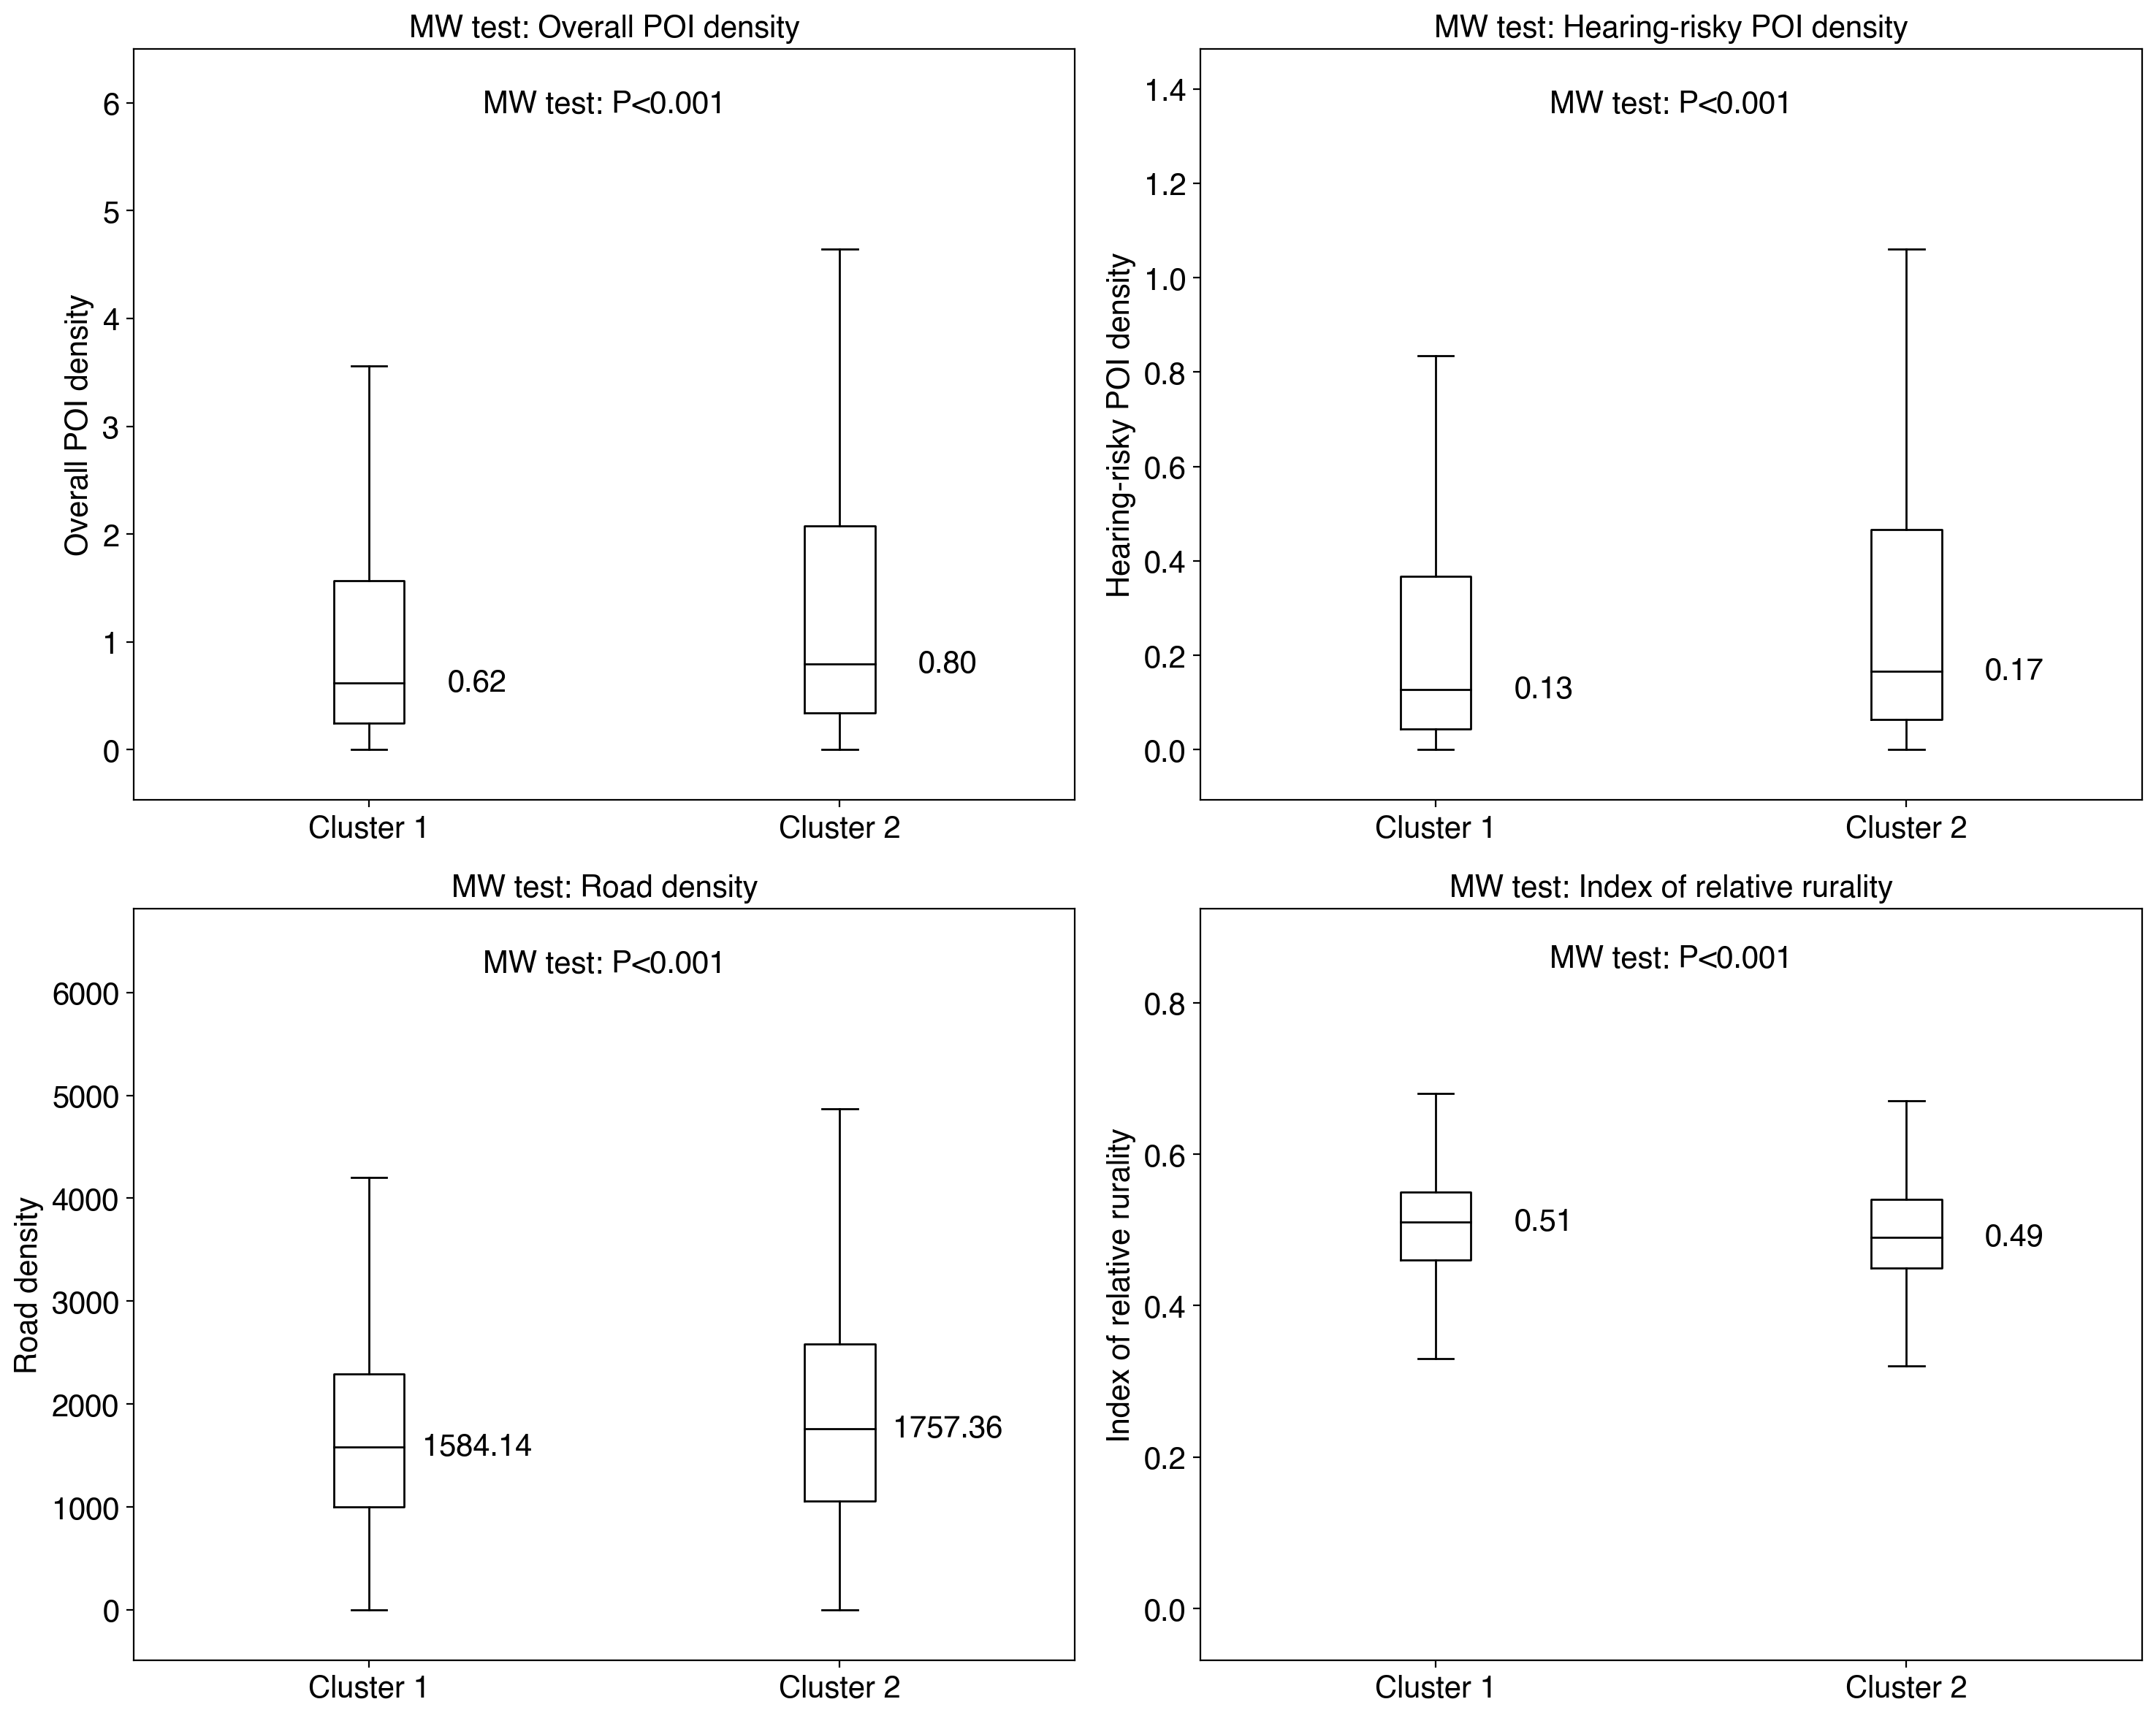

In [169]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

def prepare_data(data, col):
    df_no_outliers = pd.DataFrame()

    for cluster_label in data['Cluster'].unique():
        cluster_data = data[data['Cluster'] == cluster_label][col]
        Q1 = cluster_data.quantile(0.25)
        Q3 = cluster_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        cluster_data_no_outliers = cluster_data[(cluster_data >= lower_bound) & (cluster_data <= upper_bound)]
        df_no_outliers = pd.concat([df_no_outliers, cluster_data_no_outliers])

    max_values_no_outliers = df_no_outliers.groupby(data.loc[df_no_outliers.index, 'Cluster']).max()
    return max_values_no_outliers.max().max(), df_no_outliers


columns_to_process = ['Overall POI density', 'Hearing-risky POI density', 'Road density', 'Index of relative rurality']


import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
plt.style.use('default')
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 15

for idx, col in enumerate(columns_to_process):

    y1, df_no_outliers = prepare_data(box, col)

    df_temp = pd.concat(
        [
            box[box.Cluster == 1][col].reset_index(drop=True).rename('cluster1'),
            box[box.Cluster == 2][col].reset_index(drop=True).rename('cluster2')
        ],
        axis=1
    )

    boxprops = dict(color="black")
    whiskerprops = dict(color="black")
    capprops = dict(color="black")
    medianprops = dict(color="black")
    meanlineprops = dict(linestyle='--', linewidth=1.5, color='red')

    ax = axs[idx // 2, idx % 2]
    df_temp.boxplot(showfliers=False, grid=False, boxprops=boxprops, whiskerprops=whiskerprops,
                    capprops=capprops, medianprops=medianprops, meanprops=meanlineprops, showmeans=False, meanline=False, ax=ax)

    medians = df_temp.median()
    for i, median in enumerate(medians):
        ax.text(i + 1.23, median, f'{median:.2f}', ha='center', va='center', color='black', fontweight='bold')

    ax.set_ylabel(f"{col}", weight='bold', fontsize=15)
    ax.set_xlabel("")
    ax.set_xticklabels(['Cluster 1', 'Cluster 2'])
    ax.set_title(f"MW test: {col}", weight='bold', fontsize=15)

    stat, p_value = mannwhitneyu(
        box[box['Cluster'] == 1][col],
        box[box['Cluster'] == 2][col]
    )

    alpha = 0.05  # 显著性水平
    def get_significance_text(p_value):
        if p_value < 0.001:
            return 'MW test: P<0.001'
        elif p_value < 0.01:
            return 'MW test: P<0.01'
        elif p_value < 0.05:
            return 'MW test: P<0.05'
        else:
            return 'MW test: P>0.05'

    significance = get_significance_text(p_value)
    y_range = (y1 - df_temp.min().min()) * 0.2 
    y = y1 + y_range
    ax.text(1.5, y + y_range * 0.3, significance, ha='center', va='bottom', color='k')


    y_min = df_temp.min().min() if df_temp.min().min() < 0 else 0
    ax.set_ylim([y_min - 0.1 * abs(y_min) - 0.1 * abs(y1), y1 + y_range * 2])

plt.tight_layout()
plt.show()
